In [0]:
from fastai.vision import*

###Download Data

In [0]:
folder = 'sanjay'
path = Path('data/eye')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'manju'
path = Path('data/eye')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'varnika'
path = Path('data/eye')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'aditya'
path = Path('data/eye')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'models'
path = Path('data/eye')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
path.ls()

[PosixPath('data/eye/models'),
 PosixPath('data/eye/aditya'),
 PosixPath('data/eye/manju'),
 PosixPath('data/eye/sanjay'),
 PosixPath('data/eye/varnika')]

folder = 'Corn'
files = 'urls_Corn.csv'
path = Path('data/plant')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['manju','sanjay','aditya','varnika']

In [24]:
classes

['manju', 'sanjay', 'aditya', 'varnika']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

### **Data View**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(),bs=10, size=224, num_workers=4).normalize(imagenet_stats)

In [106]:
data.classes

['aditya', 'eye', 'manju', 'sanjay', 'varnika']

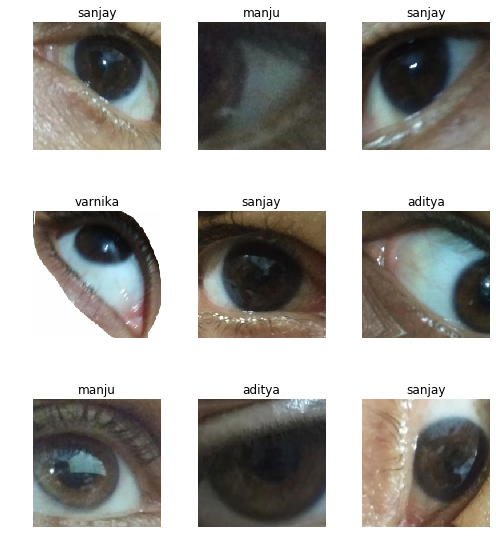

In [107]:
data.show_batch(rows=3, figsize=(7,8))

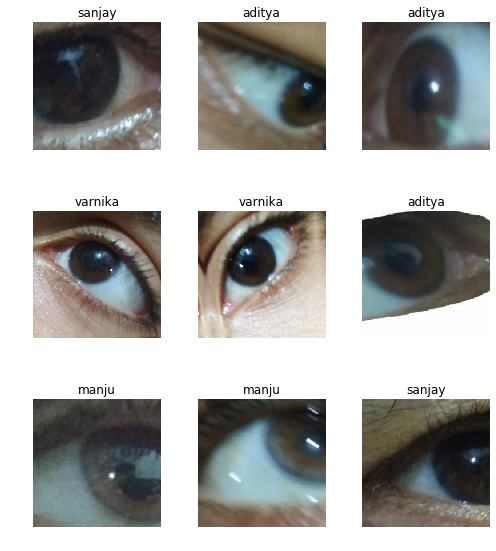

In [108]:
data.show_batch(rows=3, figsize=(7,8))


In [109]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['aditya', 'eye', 'manju', 'sanjay', 'varnika'], 5, 36, 9)

###Train

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [111]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.808804,3.088015,0.555556,00:04
1,1.497295,2.269285,0.555556,00:01


In [0]:
learn.save('stage-1_Resnet-50')

In [0]:
learn.unfreeze()

In [114]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


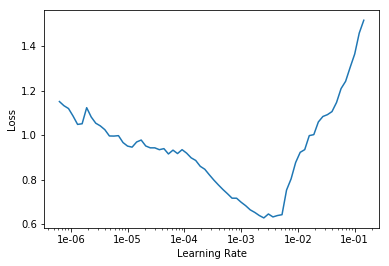

In [115]:
learn.recorder.plot()

In [116]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.102237,1.773905,0.555556,00:01
1,1.405550,1.006526,0.333333,00:01


In [0]:
learn.save('stage-2_resnet-50')

###Check


In [0]:
learn.load('stage-2_resnet-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

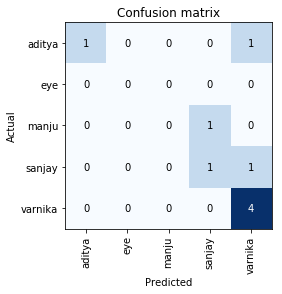

In [120]:
interp.plot_confusion_matrix()

In [121]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

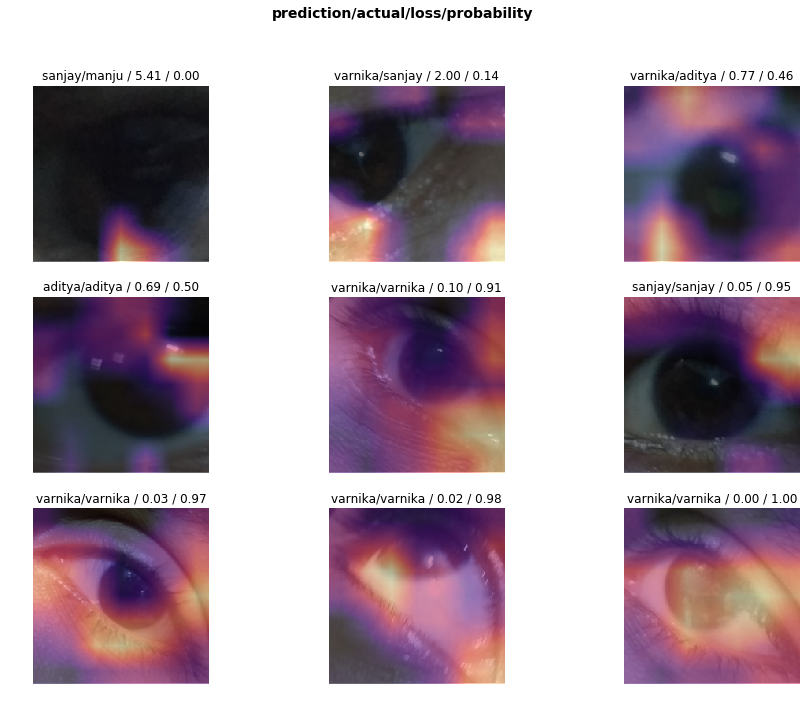

In [122]:
interp.plot_top_losses(9, figsize=(15,11))

###Dataset Cleanup

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2_resnet-34')

NameError: ignored

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [128]:
path

PosixPath('data/eye')

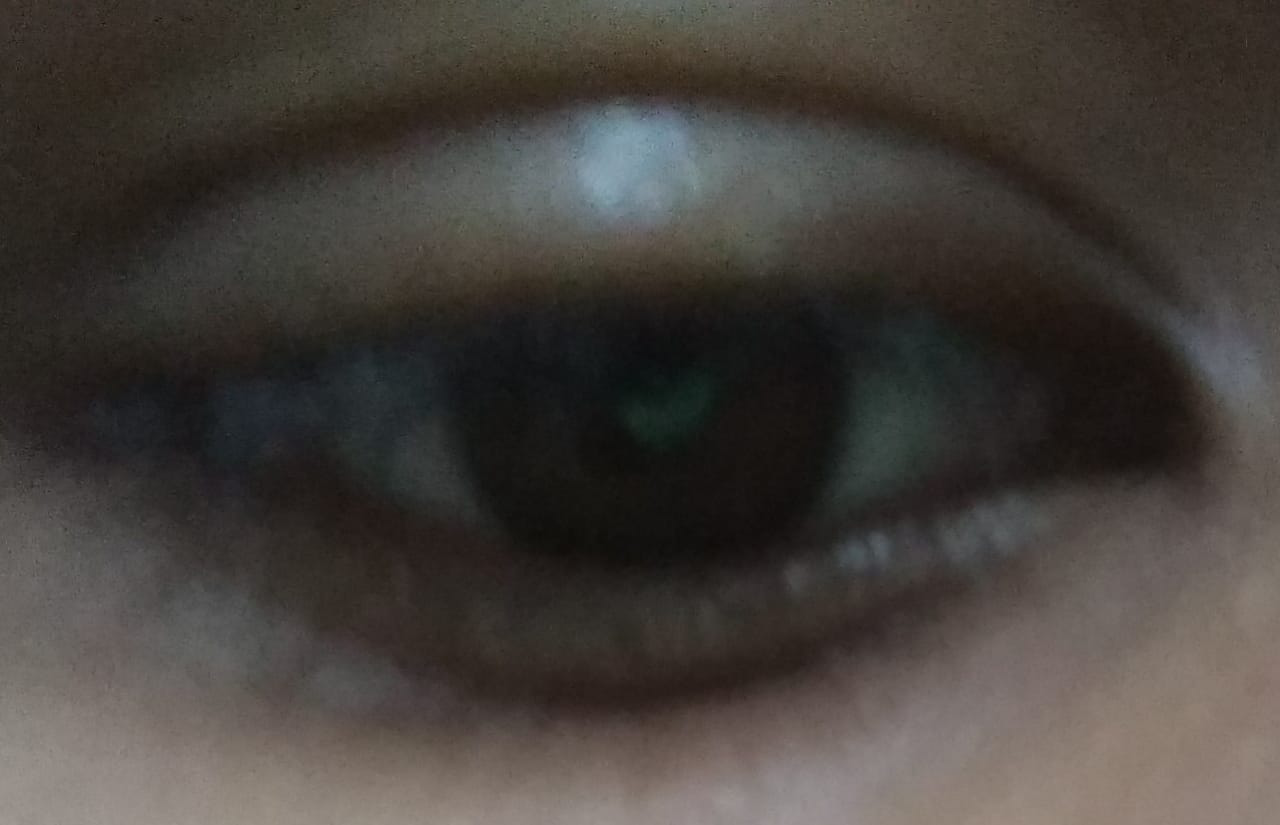

In [129]:
img = open_image(path/'t12.jpg')
img

In [0]:
learn = load_learner(path)

In [131]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category manju